In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples

In [2]:
df = pd.read_csv('/Users/kevnguyen/Library/CloudStorage/GoogleDrive-keng2413@colorado.edu/My Drive/CSCI5622/project/data/final_clean_data.csv', 
                index_col=0)

In [3]:
df.head()

,Country / Territory,ISO3,CPI score 2021,FH Political Rights Score,FH Civil Liberties Score,FH Status,Net FDI,GDP,Unemployment Rate (%),Refugee Population,Infant Mortality Rate,Population,Obligations,Aid Level
0,Denmark,DNK,88,1.0,1.0,F,1.582722e+09,3.552224e+11,5.64,5.000000,3.1,5831404.0,16986.0,Low Aid
1,Finland,FIN,88,1.0,1.0,F,-2.368877e+09,2.718918e+11,7.76,122308.012195,1.9,5529543.0,3386.0,Low Aid
2,New Zealand,NZL,88,1.0,1.0,F,4.057542e+09,2.117345e+11,4.59,35.000000,3.9,5090200.0,4707.0,Low Aid
3,Norway,NOR,85,1.0,1.0,F,-4.102660e+09,3.621983e+11,4.42,5.000000,1.8,5379475.0,21386.0,Low Aid
4,Singapore,SGP,85,4.0,4.0,PF,7.475051e+10,3.452959e+11,4.10,37.000000,1.8,5685807.0,1728315.0,Low Aid


In [4]:
X = df.select_dtypes(include=np.number) # Keep only numeric data
X

,CPI score 2021,FH Political Rights Score,FH Civil Liberties Score,Net FDI,GDP,Unemployment Rate (%),Refugee Population,Infant Mortality Rate,Population,Obligations
0,88,1.0,1.0,1.582722e+09,3.552224e+11,5.640,5.000000e+00,3.1,5831404.0,16986.0
1,88,1.0,1.0,-2.368877e+09,2.718918e+11,7.760,1.223080e+05,1.9,5529543.0,3386.0
2,88,1.0,1.0,4.057542e+09,2.117345e+11,4.590,3.500000e+01,3.9,5090200.0,4707.0
3,85,1.0,1.0,-4.102660e+09,3.621983e+11,4.420,5.000000e+00,1.8,5379475.0,21386.0
4,85,4.0,4.0,7.475051e+10,3.452959e+11,4.100,3.700000e+01,1.8,5685807.0,1728315.0
...,...,...,...,...,...,...,...,...,...,...
174,16,7.0,6.0,7.469824e+09,3.502181e+11,13.391,3.243300e+04,45.7,32284046.0,556544348.0
175,14,7.0,6.0,-4.560000e+08,3.502181e+11,6.627,1.711120e+05,21.1,28490453.0,163386454.0
176,13,7.0,7.0,4.640000e+08,6.883000e+09,19.723,8.123560e+05,72.7,16537016.0,689600465.0
177,13,7.0,7.0,7.469824e+09,1.107980e+10,10.257,6.702910e+06,18.4,20772595.0,837125251.0


In [5]:
X.shape

(168, 10)

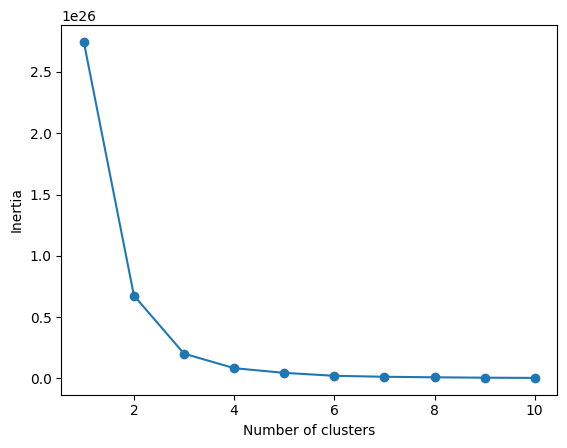

In [6]:
# Elbow Method
inertia = []
n = 10
for k in range(1, n+1):
    kmeans = KMeans(k, n_init = 'auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,n+1), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [35]:
k_opt = 3 # select optimal k at the 'elbow'
kmeans = KMeans(k_opt, n_init = 'auto')
kmeans.fit(X)

KMeans(n_clusters=3, n_init='auto')

In [8]:
kmeans.cluster_centers_

array([[4.01602564e+01, 3.93589744e+00, 3.78846154e+00, 3.88153849e+09,
        1.22975733e+11, 8.58385233e+00, 1.30161487e+05, 2.30602564e+01,
        2.29370946e+07, 2.26176643e+08],
       [4.50000000e+01, 7.00000000e+00, 6.00000000e+00, 2.53095616e+11,
        1.46876739e+13, 5.00000000e+00, 1.75361000e+05, 5.50000000e+00,
        1.41110000e+09, 3.21736110e+07],
       [5.97272727e+01, 1.81818182e+00, 2.09090909e+00, 3.60286180e+10,
        2.26952282e+12, 7.85790907e+00, 6.10845455e+03, 6.19090909e+00,
        2.04816617e+08, 4.99054677e+07]])

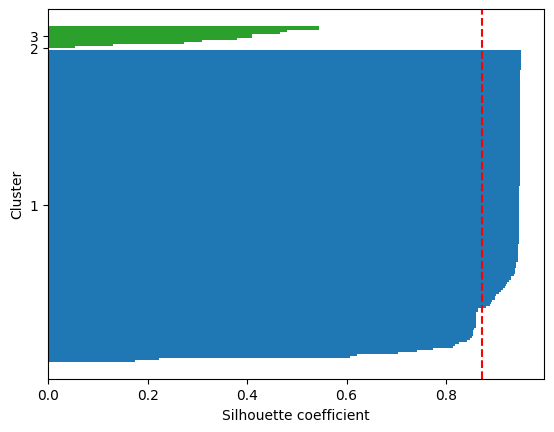

In [41]:
y_pred = kmeans.fit_predict(X)
cluster_labels = np.unique(y_pred)

silhouette_vals = silhouette_samples(X, y_pred)

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for label in cluster_labels:
    c_silhouette_vals = silhouette_vals[y_pred == label]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red",linestyle="--") # plot mean silhouette value as vertical line
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()
